In [17]:
import sys
import os
import time
import random
import pymongo
import json
from datetime import timezone, datetime
import string
import uuid
from uuid import UUID
import pandas as pd
import seaborn as sns

In [18]:
def random_generator(size=6, chars=string.ascii_uppercase):
    return ''.join(random.choice(chars) for x in range(size))
def random_hexgenerator():
    hexN="0x"+uuid.uuid4().hex
    return hexN[:18]
def timestamp_gen():
    ts=int(datetime.now(tz=timezone.utc).timestamp() * 1000)
    return ts

In [19]:
# obtain a mongo connection
from pymongo import MongoClient
client = MongoClient('localhost', 27017)

# obtain a handle to the random database
db=client.mongoengine_test
collection=db.post

In [20]:
documents_number = collection.count() * 200000
batch_number = 5 * 1000;
job_id = '1'
j=0
itr=0
MAX_ITR=10
total_docs=0
job_name = 'Job#' + job_id
write_readings={}

In [21]:
batch_documents = [i for i in range(batch_number)];

startf = datetime.now();
while itr<MAX_ITR: 
    start = datetime.now();
    for index in range(documents_number):
        try:
            ts = timestamp_gen()
            value = random.random()
            syscall_nr=random.randint(1,101)
            syscall_name=random_generator(6,"abcdefghijklmnopqrstuvwxyz")
            dtb=random_hexgenerator()
            rsp=random_hexgenerator()
            rip=random_hexgenerator()
            pid=random.randint(1,10000)
            vmid="vm"+random_generator(2,'1234')
            logtype=random_generator(3,'xyz')
            document = {
                'value' : value,
                'syscall_nr':syscall_nr,
                'syscall_name':syscall_name,
                'dtb':dtb,
                'rsp':rsp,
                'rip':rip,
                'pid':pid,
                'vmid':vmid,
                'logtype':logtype,
                'ts':ts 
                }
            #creating array/batch of documents to insert 
            batch_documents[index % batch_number] = document
            
            if (index + 1) % batch_number == 0:
                collection.insert(batch_documents)
                index += 1;
            
            #calculate the time for the insert
            timec=int((datetime.now() - start).total_seconds())
            
            #if index % 4000 == 0: 
               # print (' inserted ', index, ' documents.')

            if timec==1:
                #print (timec, 'secs for',index)
                j=j+1
                write_readings[j]=index
                itr=itr+1
                total_docs=total_docs + index
                break
                   
        except:
            print ('Unexpected error:', sys.exc_info()[0], ', for index ', index)
            raise
print (job_name, ' inserted ',total_docs, ' in ', (datetime.now() - startf).total_seconds(), 's')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.


Job#1  inserted  143965  in  10.305141 s


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fea2c26aef0>], dtype=object)

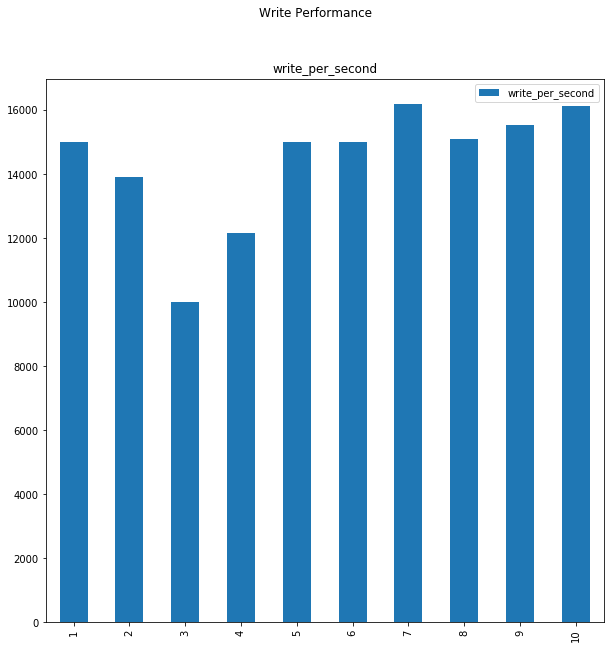

In [22]:
producer_df = pd.DataFrame.from_dict(write_readings, orient='index').rename(columns={0: 'write_per_second'})
producer_df.sort_index(inplace=True)
producer_df
producer_df.plot(kind='bar', subplots=True, figsize=(10, 10), title="Write Performance")